In [2]:
## Import dependencies

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [415]:
## news data

news = pd.read_csv('OnlineNewsPopularity.csv',sep=',')

In [418]:
news.columns

Index([u'url', u' timedelta', u' n_tokens_title', u' n_tokens_content',
       u' n_unique_tokens', u' n_non_stop_words', u' n_non_stop_unique_tokens',
       u' num_hrefs', u' num_self_hrefs', u' num_imgs', u' num_videos',
       u' average_token_length', u' num_keywords',
       u' data_channel_is_lifestyle', u' data_channel_is_entertainment',
       u' data_channel_is_bus', u' data_channel_is_socmed',
       u' data_channel_is_tech', u' data_channel_is_world', u' kw_min_min',
       u' kw_max_min', u' kw_avg_min', u' kw_min_max', u' kw_max_max',
       u' kw_avg_max', u' kw_min_avg', u' kw_max_avg', u' kw_avg_avg',
       u' self_reference_min_shares', u' self_reference_max_shares',
       u' self_reference_avg_sharess', u' weekday_is_monday',
       u' weekday_is_tuesday', u' weekday_is_wednesday',
       u' weekday_is_thursday', u' weekday_is_friday', u' weekday_is_saturday',
       u' weekday_is_sunday', u' is_weekend', u' LDA_00', u' LDA_01',
       u' LDA_02', u' LDA_03', u' LD

In [421]:
## remove whitespace in column names

news.columns = [ x.strip() for x in news.columns]

In [422]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


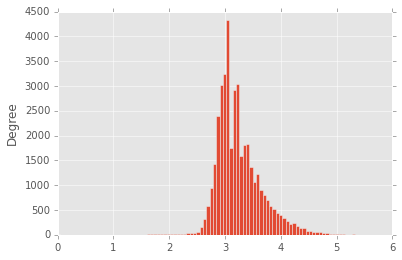

In [428]:
news['shares'].map( lambda x: np.log10(x) ).plot(kind='hist',bins=100)

In [299]:
news_trimmed_features = news.ix[:,'timedelta':'shares']

In [429]:
log_values = list(news_trimmed_features.columns[news_trimmed_features.describe().reset_index().loc[7][1:]>1])

In [430]:
## logarithmically scale the large features

for l in log_values:
    news_trimmed_features[l] = np.log10(news_trimmed_features[l]+1)

In [431]:
news_trimmed_features.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.531735,0.311212,0.542389,0.072653,0.110895,0.086453,0.279180,0.174377,0.155810,0.058978,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,0.053246,0.017761,0.102107,0.016611,0.019587,0.017908,0.085195,0.089444,0.114781,0.090675,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,0.290978,0.169416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.507516,0.301030,0.530545,0.067285,0.114287,0.083162,0.230186,0.114287,0.114287,0.000000,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,0.547957,0.309927,0.557842,0.074561,0.114287,0.089202,0.290978,0.204679,0.114287,0.000000,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,0.572267,0.325093,0.586083,0.081518,0.114287,0.094885,0.337677,0.230186,0.230186,0.114287,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,0.587095,0.376616,0.692683,0.585047,0.604041,0.581333,0.542116,0.486882,0.492843,0.471847,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [303]:
news_trimmed_features = news_trimmed_features.replace([np.inf, -np.inf], np.nan)
news_trimmed_features = news_trimmed_features.fillna(method='pad')

In [304]:
news_response = news_trimmed_features['shares']
news_trimmed_features = news_trimmed_features.ix[:,'timedelta':'abs_title_sentiment_polarity']

In [305]:
news_trimmed_features = news_trimmed_features.drop('weekday_is_sunday',1)
news_trimmed_features = news_trimmed_features.drop('LDA_00',1)

In [306]:
from sklearn import cross_validation
news_features_train, news_features_test, news_shares_train, news_shares_test = \
cross_validation.train_test_split(news_trimmed_features, news_response, test_size=0.4, random_state=0)

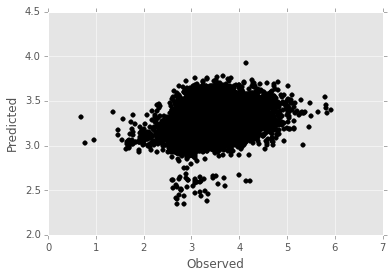

In [436]:
from sklearn import linear_model
lmodel = linear_model.LinearRegression().fit(news_features_train, news_shares_train)
plt.scatter(news_shares_train,lmodel.predict(news_features_train),color='black')
plt.xlabel('Observed')
plt.ylabel('Predicted')

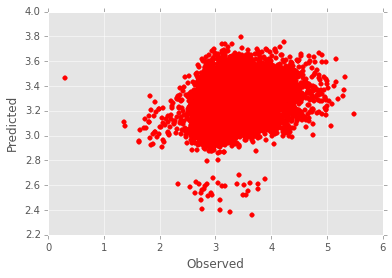

In [437]:
plt.scatter(news_shares_test,lmodel.predict(news_features_test),color='red')
plt.xlabel('Observed')
plt.ylabel('Predicted')

In [342]:
lmodel.score(news_features_train, news_shares_train)

0.12903488253983986

In [329]:
lmodel.score(news_features_test, news_shares_test)

0.10897779832796251

In [450]:
ix = np.argsort(abs(lmodel.coef_))[::-1][:]
news_trimmed_features.columns[ix]

Index([u'n_unique_tokens', u'n_non_stop_unique_tokens', u'n_non_stop_words',
       u'kw_avg_avg', u'global_rate_positive_words',
       u'self_reference_avg_sharess', u'global_subjectivity', u'LDA_02',
       u'num_keywords', u'self_reference_max_shares', u'n_tokens_content',
       u'LDA_03', u'LDA_01', u'data_channel_is_entertainment', u'num_hrefs',
       u'num_self_hrefs', u'global_sentiment_polarity', u'kw_max_max',
       u'is_weekend', u'rate_positive_words', u'LDA_04',
       u'average_token_length', u'min_positive_polarity',
       u'data_channel_is_bus', u'data_channel_is_world', u'num_videos',
       u'global_rate_negative_words', u'data_channel_is_lifestyle',
       u'num_imgs', u'avg_positive_polarity', u'abs_title_subjectivity',
       u'data_channel_is_socmed', u'n_tokens_title', u'kw_max_avg',
       u'self_reference_min_shares', u'rate_negative_words',
       u'title_sentiment_polarity', u'weekday_is_tuesday',
       u'min_negative_polarity', u'weekday_is_wednesday',


In [365]:
lmodel_ridge = linear_model.RidgeCV().fit(news_features_train, news_shares_train)

In [451]:
lmodel_ridge.alpha_

0.10000000000000001

In [452]:
lmodel_ridge.score(news_features_test, news_shares_test)

0.10872000697379602

In [360]:
lmodel_lasso = linear_model.LassoCV(max_iter=10000).fit(news_features_train, news_shares_train)

In [361]:
lmodel_lasso.alpha_

6.2489899735883458e-05

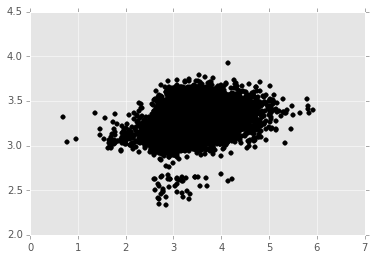

In [362]:
plt.scatter(news_shares_train,lmodel_lasso.predict(news_features_train),color='black')

In [363]:
lmodel_lasso.score(news_features_test, news_shares_test)

0.10915566003563759

In [367]:
lmodel.score(news_features_test, news_shares_test)

0.10897779832796251

In [381]:
from sklearn.tree import DecisionTreeRegressor

max_depths = [2,4,6,8,32,64,128,256]

dtrees = []

for m in max_depths:
    dtrees.append(DecisionTreeRegressor(min_samples_leaf=20,max_depth=m).\
                  fit(news_features_train, news_shares_train))

In [401]:
r2_values = []

for d in dtrees:
    r2_values.append(d.score(news_features_test, news_shares_test))

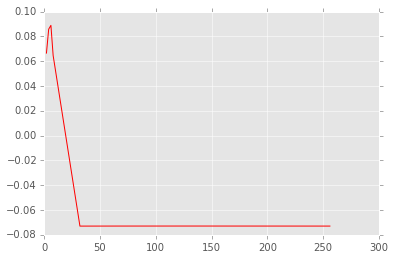

In [402]:
plt.plot(max_depths,r2_values,color='red')

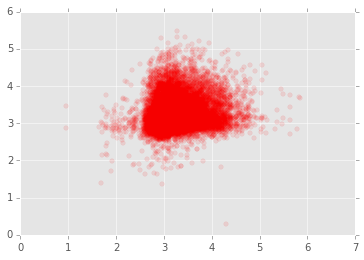

In [380]:
plt.scatter(dtree.predict(news_features_test), news_shares_test, color='red',alpha=0.1)

In [391]:
from sklearn import ensemble

rforests = []
num_trees = [2,4,6,8,32,64,128,256]

for n in num_trees:
    rforests.append(ensemble.RandomForestRegressor(n_estimators=n,min_samples_leaf=20).fit(news_features_train, news_shares_train))


In [397]:
r2_values_rforest = []

for f in rforests:
    r2_values_rforest.append(f.score(news_features_test, news_shares_test))

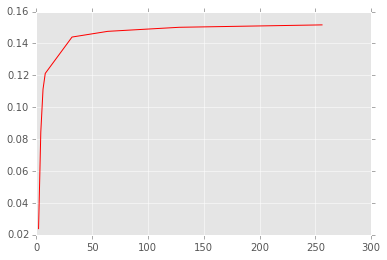

In [398]:
plt.plot(num_trees,r2_values_rforest,color='red')

In [455]:
ix = np.argsort(abs(f[5].feature_importances_))[::-1][:]
news_trimmed_features.columns[ix]


Index([u'kw_avg_avg', u'self_reference_avg_sharess', u'kw_max_avg',
       u'timedelta', u'global_subjectivity', u'average_token_length',
       u'LDA_01', u'LDA_04', u'kw_avg_max', u'kw_avg_min',
       u'self_reference_min_shares', u'n_unique_tokens', u'num_hrefs',
       u'LDA_02', u'n_non_stop_unique_tokens', u'data_channel_is_tech',
       u'LDA_03', u'is_weekend', u'n_tokens_content',
       u'data_channel_is_entertainment', u'global_rate_negative_words',
       u'kw_min_avg', u'min_positive_polarity', u'avg_positive_polarity',
       u'kw_max_min', u'avg_negative_polarity', u'global_rate_positive_words',
       u'global_sentiment_polarity', u'n_tokens_title',
       u'abs_title_sentiment_polarity', u'kw_min_max',
       u'self_reference_max_shares', u'data_channel_is_socmed',
       u'title_sentiment_polarity', u'rate_positive_words', u'num_imgs',
       u'rate_negative_words', u'num_videos', u'max_positive_polarity',
       u'title_subjectivity', u'min_negative_polarity', u'num